De acuerdo al cuestionario del lunes, ustedes respondieron "Respuestas", usando Respuestas y Random_nums responde la siguientes preguntas

In [358]:
import random
import numpy as np
import pandas as pd
import scipy.stats.distributions as dist
import seaborn as sns
import scipy.stats as stats
from collections import Counter
import matplotlib.pyplot as plt

In [359]:
Respuestas = ["6","pi","Lentes","5","8","11",
              "10000000","3.1416","1","8","53",
              "58","5","raízde2","8","99","$",
              "Pi","6","9","10","7",".-.","11",
              "70","13","10","28","159","37"]
np.random.seed(42)


#### Limpieza de datos y creación de un DataFrame

In [360]:
df_f=pd.DataFrame(Respuestas)
df_f[0] = df_f[0].replace(["pi","Pi"],3.1416)
df_f[0] = df_f[0].replace("raízde2",2**0.5)
df_f[0] = df_f[0].replace(["Lentes","$",".-."],np.nan) 
df_f=df_f.astype(float)
df_f

,0
0,6.000000e+00
1,3.141600e+00
2,NaN
3,5.000000e+00
4,8.000000e+00
5,1.100000e+01
6,1.000000e+07
7,3.141600e+00
8,1.000000e+00
9,8.000000e+00


In [361]:
#Creación de Columna de valores random
Random_nums = list(np.random.randint(0,10000000,len(df_f)))
random=pd.DataFrame(Random_nums)
df_f["random"]=random[0]
df_f

,0,random
0,6.000000e+00,6423388
1,3.141600e+00,6550634
2,NaN,4304572
3,5.000000e+00,2234489
4,8.000000e+00,9958614
5,1.100000e+01,9524682
6,1.000000e+07,7204212
7,3.141600e+00,9628519
8,1.000000e+00,4472471
9,8.000000e+00,4523669


In [362]:
df_f=df_f[df_f[0].notna()]    #Quitamos valores Nan que afecten a los calculos
df_f

,0,random
0,6.000000e+00,6423388
1,3.141600e+00,6550634
3,5.000000e+00,2234489
4,8.000000e+00,9958614
5,1.100000e+01,9524682
6,1.000000e+07,7204212
7,3.141600e+00,9628519
8,1.000000e+00,4472471
9,8.000000e+00,4523669
10,5.300000e+01,7404852


In [363]:
df_f["sum"]=df_f.sum(axis=1)     #Creamos una columna que resulta de la suma de los valores iniciales de Respuestas y la lista de Random.
df_f

C:\Users\sabri\AppData\Local\Temp\ipykernel_7696\33474073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f["sum"]=df_f.sum(axis=1)     #Creamos una columna que resulta de la suma de los valores iniciales de Respuestas y la lista de Random.


,0,random,sum
0,6.000000e+00,6423388,6.423394e+06
1,3.141600e+00,6550634,6.550637e+06
3,5.000000e+00,2234489,2.234494e+06
4,8.000000e+00,9958614,9.958622e+06
5,1.100000e+01,9524682,9.524693e+06
6,1.000000e+07,7204212,1.720421e+07
7,3.141600e+00,9628519,9.628522e+06
8,1.000000e+00,4472471,4.472472e+06
9,8.000000e+00,4523669,4.523677e+06
10,5.300000e+01,7404852,7.404905e+06


Hipótesis: La mediana de esos números es 10.

Usando boostraping ¿qué nivel de confianza debes usar para que se acepte la hipótesis?

In [364]:
#De los números introducidos en Respuestas se realizará lo siguiente:
data=df_f[0]
stats.t.interval(alpha=0.0000022,
                 df=len(data)-1,
                 loc=np.median(data),
                 scale=stats.sem(data))



(7.968919248727886, 10.031080751272114)

In [365]:
f'El nivel de hipotesis que se debe que usar para decir que la mediana de los datos "Resultados" es de 10 es de {0.0000022*100}%'

'El nivel de hipotesis que se debe que usar para decir que la mediana de los datos "Resultados" es de 10 es de 0.00022%'

# Obten los siguientes estadísticos

Media

Mediana

Desviación est.

Min

Max

In [366]:
f"El promedio es de: {df_f['sum'].mean()}"         

'El promedio es de: 5927695.36440791'

In [367]:
f"La mediana es de: {df_f['sum'].median()}"      

'La mediana es de: 5664799.0'

In [368]:
f"La desvación estándar es de: {df_f['sum'].std()}"   

'La desvación estándar es de: 3727665.4228910245'

In [369]:
f"El valor minimo es de: {df_f['sum'].min()}  y el valor máximo es de {df_f['sum'].max()}"   

'El valor minimo es de: 84813.0  y el valor máximo es de 17204212.0'

# Outliers

### Utilizando el z-score y el rango intercuartil, ¿Cuáles son los outiers de los datos? Grafícalo con un diagrama de caja

In [370]:
IQR = np.percentile(df_f['sum'],75)-np.percentile(df_f['sum'],25)
IQR_15 = IQR*1.5
(np.percentile(df_f['sum'],25)-IQR_15,np.percentile(df_f['sum'],75)+IQR_15)

(-2925523.5, 15298992.5)

<AxesSubplot:xlabel='sum'>

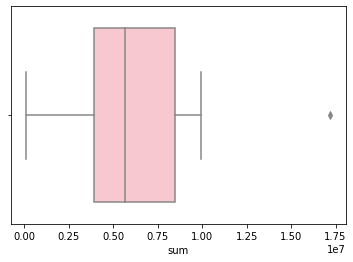

In [371]:

sns.boxplot( x=df_f['sum'],color="pink")

In [372]:
mean = (df_f["sum"]).mean()
std = (df_f["sum"]).std()
print('Media : ', mean)
print('Desviación estándar: ', std)

Media :  5927695.36440791
Desviación estándar:  3727665.4228910245


In [373]:
# z standarization es para normalizar los datos para poder definir si sobrepasan o no un umbral ( tambien se pueden usar para comparar variables X con Y)
threshold = 2.0
outlier = []
for i in df_f["sum"]:
    z = (i-mean)/std
    if z > threshold or z < - threshold:
        outlier.append(i)
print('Outliner:', outlier)

Outliner: [17204212.0]


#### Pregunta Extra (usnado p-value): ¿Si lanzo una moneda 6 veces y las 6 veces sale "Águila", es un evento "normal"?

El evento igual de probable que salgan 6 Águilas es el que salgan 6 soles.  
La probabilidad de ambos eventos es de 0.5**6.

In [374]:
p_value=(0.5**6)*2
p_value


0.03125

In [375]:
p_value>0.05

False

Como p_value es menor a 0.05 se dice que se la hipotesis es falsa y el evento no es "normal".